## Capstone Project - Default of Credit Card Clients

Prepared by Debora Callegari

### Imports

In [1]:
#Importing the necessary packages:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.gridspec as gridspec

import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier


import warnings
warnings.filterwarnings('ignore')

### Step 7: Feature Engineering

For this case, I believe it is important to build new features that will be useful to perform the models again. There is an applicable information when comparing the ratio of the bill amount with the amount of given credit for each month.

In [66]:
df_dummy_2.head()

,limit_bal,age,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,...,pay_5_7,pay_5_8,pay_6_0,pay_6_2,pay_6_3,pay_6_4,pay_6_5,pay_6_6,pay_6_7,pay_6_8
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,24,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,...,0,0,1,0,0,0,0,0,0,0
2,120000.0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,...,0,0,0,1,0,0,0,0,0,0
3,90000.0,34,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,...,0,0,1,0,0,0,0,0,0,0
4,50000.0,37,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,...,0,0,1,0,0,0,0,0,0,0
5,50000.0,57,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,...,0,0,1,0,0,0,0,0,0,0


In [67]:
feat_eng_data = df_dummy_2.copy()

In [68]:
feat_eng_data['limit_used1'] = feat_eng_data['bill_amt1'] / feat_eng_data['limit_bal']
feat_eng_data['limit_used2'] = feat_eng_data['bill_amt2'] / feat_eng_data['limit_bal']
feat_eng_data['limit_used3'] = feat_eng_data['bill_amt3'] / feat_eng_data['limit_bal']
feat_eng_data['limit_used4'] = feat_eng_data['bill_amt4'] / feat_eng_data['limit_bal']
feat_eng_data['limit_used5'] = feat_eng_data['bill_amt5'] / feat_eng_data['limit_bal']
feat_eng_data['limit_used6'] = feat_eng_data['bill_amt6'] / feat_eng_data['limit_bal']

In [69]:
feat_eng_data.head()

,limit_bal,age,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,...,pay_6_5,pay_6_6,pay_6_7,pay_6_8,limit_used1,limit_used2,limit_used3,limit_used4,limit_used5,limit_used6
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,24,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,...,0,0,0,0,0.195650,0.155100,0.034450,0.000000,0.000000,0.000000
2,120000.0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,...,0,0,0,0,0.022350,0.014375,0.022350,0.027267,0.028792,0.027175
3,90000.0,34,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,...,0,0,0,0,0.324878,0.155856,0.150656,0.159233,0.166089,0.172767
4,50000.0,37,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,...,0,0,0,0,0.939800,0.964660,0.985820,0.566280,0.579180,0.590940
5,50000.0,57,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,...,0,0,0,0,0.172340,0.113400,0.716700,0.418800,0.382920,0.382620


### Step 8: Fitting models after Feature Engineering

#### Splitting the data

In [70]:
X_1 = feat_eng_data.drop('default', axis=1)
y_1 = feat_eng_data['default']

In [71]:
print("X_1 shape:", X_1.shape)
print("y_1 shape:", y_1.shape)

X_1 shape: (29623, 80)
y_1 shape: (29623,)


In [72]:
# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.2, stratify = y_1, random_state=42)

In [73]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (23698, 80)
y_train shape: (23698,)
X_test shape: (5925, 80)
y_test shape: (5925,)


In [74]:
#Transforming data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### 8.1. Logistic regression

In [75]:
# Fitting logistic regression model the training data
LR_model_1 = LogisticRegression(random_state=42, class_weight='balanced')
LR_model_1.fit(X_train, y_train)

# Evaluating the model
y_pred_train_LR_1 = LR_model_1.predict(X_train)
y_pred_test_LR_1 = LR_model_1.predict(X_test)

# print(f"Train Accuracy: {100*metrics.accuracy_score(y_train, y_pred_train_LR):3.3f}")
print(f"Train Precision: {100*precision_score(y_train, y_pred_train_LR_1):3.3f}")
print(f"Train Recall: {100*recall_score(y_train, y_pred_train_LR_1):3.3f}")
print(f"Train F1: {100*f1_score(y_train, y_pred_train_LR_1):3.3f}")

print('\n')

# print(f"Test Accuracy: {100*metrics.accuracy_score(y_test, y_pred_test_LR):3.3f}")
print(f"Test Precision: {100*precision_score(y_test, y_pred_test_LR_1):3.3f}")
print(f"Test Recall: {100*recall_score(y_test, y_pred_test_LR_1):3.3f}")
print(f"Test F1: {100*f1_score(y_test, y_pred_test_LR_1):3.3f}")

Train Precision: 50.958
Train Recall: 56.376
Train F1: 53.530


Test Precision: 50.577
Test Recall: 56.914
Test F1: 53.559


In [76]:
# Getting the classification report
print(classification_report(y_test, y_pred_test_LR_1))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86      4616
           1       0.51      0.57      0.54      1309

   micro avg       0.78      0.78      0.78      5925
   macro avg       0.69      0.71      0.70      5925
weighted avg       0.79      0.78      0.79      5925



[[3888  728]
 [ 564  745]]


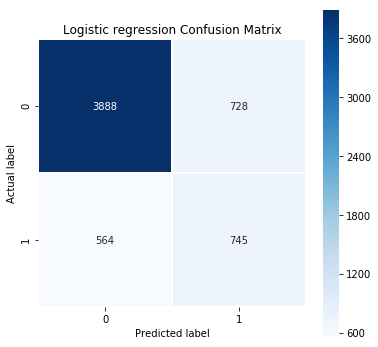

In [77]:
# Getting the confusion matrix
cm_LR_1 = confusion_matrix(y_test, y_pred_test_LR_1)
print(cm_LR_1)

# Plotting the confusion matrix with seaborn
plt.figure(figsize=(6,6))
sns.heatmap(cm_LR_1, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
plt.title('Logistic regression Confusion Matrix');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

#### 8.2. Decision Tree

In [78]:
# Fitting Decision Tree model to the training data
DT_model_1 = DecisionTreeClassifier(random_state=42, class_weight='balanced')
DT_model_1.fit(X_train, y_train)

# Evaluating the model
y_pred_train_DT_1 = DT_model_1.predict(X_train)
y_pred_test_DT_1 = DT_model_1.predict(X_test)

print(f"Train Precision: {100*precision_score(y_train, y_pred_train_DT_1):3.3f}")
print(f"Train Recall: {100*recall_score(y_train, y_pred_train_DT_1):3.3f}")
print(f"Train F1: {100*f1_score(y_train, y_pred_train_DT_1):3.3f}")

print('\n')

print(f"Test Precision: {100*precision_score(y_test, y_pred_test_DT_1):3.3f}")
print(f"Test Recall: {100*recall_score(y_test, y_pred_test_DT_1):3.3f}")
print(f"Test F1: {100*f1_score(y_test, y_pred_test_DT_1):3.3f}")

Train Precision: 99.658
Train Recall: 100.000
Train F1: 99.828


Test Precision: 38.456
Test Recall: 38.808
Test F1: 38.631


In [79]:
# Getting the classification report
print(classification_report(y_test, y_pred_test_DT_1))

              precision    recall  f1-score   support

           0       0.83      0.82      0.82      4616
           1       0.38      0.39      0.39      1309

   micro avg       0.73      0.73      0.73      5925
   macro avg       0.61      0.61      0.61      5925
weighted avg       0.73      0.73      0.73      5925



[[3803  813]
 [ 801  508]]


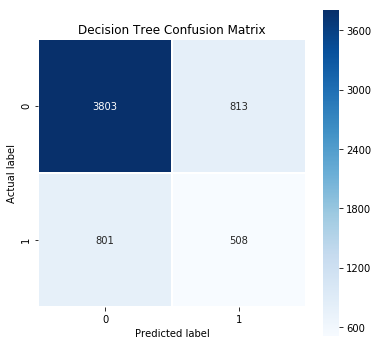

In [80]:
# Getting the confusion matrix
cm_DT_1 = confusion_matrix(y_test, y_pred_test_DT_1)
print(cm_DT_1)

# Plotting the confusion matrix with seaborn
plt.figure(figsize=(6,6))
sns.heatmap(cm_DT_1, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
plt.title('Decision Tree Confusion Matrix');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

#### 8.3. Support Vector Machines

In [81]:
SVC_model_1 = SVC(kernel='rbf', class_weight='balanced', probability=True)
SVC_model_1.fit(X_train, y_train)

# Evaluating the model
y_pred_train_SVC_1 = SVC_model_1.predict(X_train)
y_pred_test_SVC_1 = SVC_model_1.predict(X_test)


print(f"Train Precision: {100*precision_score(y_train, y_pred_train_SVC_1):3.3f}")
print(f"Train Recall: {100*recall_score(y_train, y_pred_train_SVC_1):3.3f}")
print(f"Train F1: {100*f1_score(y_train, y_pred_train_SVC_1):3.3f}")

print('\n')

print(f"Test Precision: {100*precision_score(y_test, y_pred_test_SVC_1):3.3f}")
print(f"Test Recall: {100*recall_score(y_test, y_pred_test_SVC_1):3.3f}")
print(f"Test F1: {100*f1_score(y_test, y_pred_test_SVC_1):3.3f}")

Train Precision: 48.391
Train Recall: 61.168
Train F1: 54.035


Test Precision: 47.356
Test Recall: 61.574
Test F1: 53.537


In [82]:
# Getting the classification report
print(classification_report(y_test, y_pred_test_SVC_1))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84      4616
           1       0.47      0.62      0.54      1309

   micro avg       0.76      0.76      0.76      5925
   macro avg       0.68      0.71      0.69      5925
weighted avg       0.79      0.76      0.77      5925



[[3720  896]
 [ 503  806]]


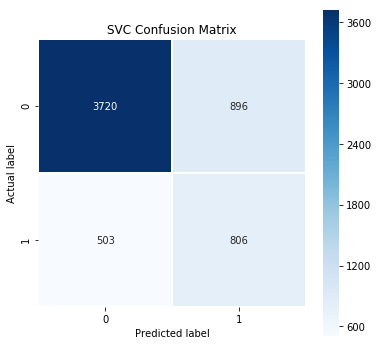

In [83]:
# Getting the confusion matrix
cm_SVC_1 = confusion_matrix(y_test, y_pred_test_SVC_1)
print(cm_SVC_1)

# Plotting the confusion matrix with seaborn
plt.figure(figsize=(6,6))
sns.heatmap(cm_SVC_1, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
plt.title('SVC Confusion Matrix');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

#### 8.4. Random Forest

In [84]:
RF_model_1 = RandomForestClassifier(class_weight='balanced', random_state = 42)
RF_model_1.fit(X_train,y_train)


y_pred_train_RF_1 = RF_model_1.predict(X_train)
y_pred_test_RF_1 = RF_model_1.predict(X_test)


print(f"Train Precision: {100*precision_score(y_train, y_pred_train_RF_1):3.3f}")
print(f"Train Recall: {100*recall_score(y_train, y_pred_train_RF_1):3.3f}")
print(f"Train F1: {100*f1_score(y_train, y_pred_train_RF_1):3.3f}")

print('\n')

print(f"Test Precision: {100*precision_score(y_test, y_pred_test_RF_1):3.3f}")
print(f"Test Recall: {100*recall_score(y_test, y_pred_test_RF_1):3.3f}")
print(f"Test F1: {100*f1_score(y_test, y_pred_test_RF_1):3.3f}")

Train Precision: 99.369
Train Recall: 90.225
Train F1: 94.577


Test Precision: 63.788
Test Recall: 32.162
Test F1: 42.763


In [85]:
# Getting the classification report
print(classification_report(y_test, y_pred_test_RF_1))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4616
           1       0.64      0.32      0.43      1309

   micro avg       0.81      0.81      0.81      5925
   macro avg       0.73      0.63      0.66      5925
weighted avg       0.79      0.81      0.78      5925



[[4377  239]
 [ 888  421]]


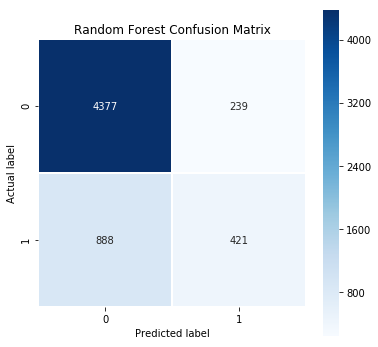

In [86]:
# Getting the confusion matrix
cm_RF_1 = confusion_matrix(y_test, y_pred_test_RF_1)
print(cm_RF_1)

# Plotting the confusion matrix with seaborn
plt.figure(figsize=(6,6))
sns.heatmap(cm_RF_1, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
plt.title('Random Forest Confusion Matrix');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

Considering that I used the information that I have, we can conclude that after feature engineering in the dataset the F1 score for the majority of the models were able to present a slightly increased and my goal for minimizing the false negative was reached when the majority of the models presenting a slight decrease for the False Negative.